# Application Example

### Step 1: Load basic python libraries 

In [8]:
# This is used to display images within the browser 
%matplotlib inline 


import os
import numpy as np
import matplotlib.pyplot as plt
import dicom as pydicom # library to load dicom images 
import cPickle
from sklearn.preprocessing import StandardScaler

### Step 2: Load the classifier and the images 
    # load a classifier that has been saved in pickle form
        with open('my_dumped_classifier.pkl', 'rb') as fid:
        gnb_loaded = cPickle.load(fid)

In [9]:
with open('Decision Tree.pkl', 'rb') as fid:
    classifier = cPickle.load(fid)
print (dir(classifier))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_estimator_type', '_get_param_names', '_validate_X_predict', 'apply', 'class_weight', 'classes_', 'criterion', 'decision_path', 'feature_importances_', 'fit', 'fit_transform', 'get_params', 'max_depth', 'max_features', 'max_features_', 'max_leaf_nodes', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_classes_', 'n_features_', 'n_outputs_', 'predict', 'predict_log_proba', 'predict_proba', 'presort', 'random_state', 'score', 'set_params', 'splitter', 'transform', 'tree_']


# Step 3: Load the unknown image and perform the segmetnation

In [10]:
CurrentDir= os.getcwd()

# Print current directory
print (CurrentDir)

# Get parent direcotry 
print(os.path.abspath(os.path.join(CurrentDir, os.pardir)))

# Create the file paths. The images are contained in a subfolder called Data. 
PostName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data",  'POST.nii.gz')  )
PreName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'PRE.nii.gz') )
FLAIRName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'FLAIR.nii.gz') )
GT =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'GroundTruth.nii.gz') )


# read Pre in--we assume that all images are same x,y dims
Pre = nib.load(PreName)
# Pre is a class containing the image data among other information 
Pre=Pre.get_data()
xdim = np.shape(Pre)[0]
ydim = np.shape(Pre)[1]
zdim = np.shape(Pre)[2]
# Printing the dimensions of an image 
print ('Dimensions')
print (xdim,ydim,zdim)
# make space in a numpy array for the images
ArrayDicom = np.zeros((xdim, ydim,zdim, 4), dtype=Pre.dtype)
# copy Pre pixels into z=0
ArrayDicom[:, :, :, 0] = Pre
# Post
Post = nib.load(PostName)
# Pre is a class containing the image data among other information 
Post=Post.get_data()
ArrayDicom[:, :, :, 1] = Post
#FLAIR
Flair = nib.load(FLAIRName)


/Users/m112447/Dropbox/MachineLearningForMedicalImages/notebooks
/Users/m112447/Dropbox/MachineLearningForMedicalImages
Dimensions
(256, 256)


# Step 4: Use the pretrained classifier to perform segmentation

#### Reshape the data

In [11]:
print ('Shape before reshape')
print (np.shape(ArrayDicom))
ArrayDicom=ArrayDicom.reshape(-1,2)
print ('Shape after reshape')
print (np.shape(ArrayDicom))



Shape before reshape
(256, 256, 2)
Shape after reshape
(65536, 2)


#### Appy trained classifier 

In [12]:
ArrayDicom = StandardScaler().fit_transform(ArrayDicom)
Labels=classifier.predict(ArrayDicom)
print np.shape(Labels)

(65536,)


#### Visualize results

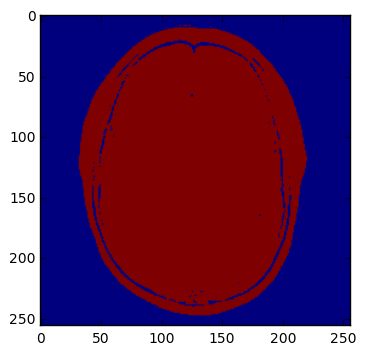

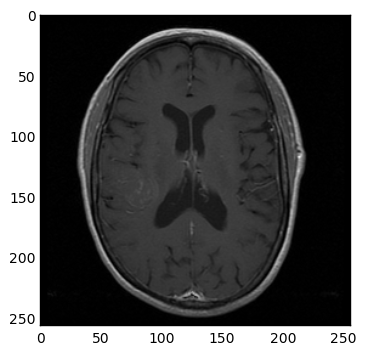

In [15]:
# respape to image
Labels=Labels.reshape(256,256)
plt.figure()
plt.imshow(Labels)
plt.show()

plt.figure()
plt.imshow(Post.pixel_array, cmap=plt.cm.gray)
plt.show()